### Offsets

ndc10gfp_g7_l1_ts_002_ctf_1xBin: 

z, dz = 135 * 6, 90 * 6
y, dy = 370 * 6, 250 * 6
x, dx = 150 * 6, 250 * 6

rotacell_grid1_TS09_ctf_1xBin:

z, dz = 160 * 6, 90 * 6
y, dy = 360 * 6, 250 * 6
x, dx = 340 * 6, 250 * 6

rotacell_grid1_TS10_ctf_1xBin:

z, dz = 117 * 6, 90 * 6
y, dy = 100 * 6, 250 * 6
x, dx = 150 * 6, 250 * 6

In [1]:
import mrcfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from copy import copy

def load(path):
    return mrcfile.mmap(path, mode='r').data

def save(save_path, data):
    with mrcfile.new(save_path, overwrite=True) as mrc:
        mrc.set_data(data)

def get_contrast(image, sigma=2):
    if sigma==None:
        return image.min(), image.max()
        
    mean = np.mean(image)
    std = np.std(image)
    
    lower_value = mean - sigma * std
    upper_value = mean + sigma * std
    return lower_value, upper_value

def auto_contrast(image, sigma=2):
    if sigma==None:
        return image
        
    lower_value, upper_value = get_contrast(image, sigma=sigma)

    return np.clip(image, lower_value, upper_value)

In [9]:
raw_1x_path = "/nfs/datasync4/inacio/data/raw_data/cryo/novareconstructions/cropped/rotacell_grid1_TS09_ctf_1xBin.rec"
raw_3x_path = "/nfs/datasync4/inacio/data/raw_data/cryo/novareconstructions/rotacell_grid1_TS09_ctf_3xBin.rec"
raw_6x_path = "/nfs/datasync4/inacio/data/raw_data/cryo/novareconstructions/rotacell_grid1_TS09_ctf_6xBin.rec"
cs_1x_path = "/nfs/datasync4/inacio/data/denoising/cryosamba/rotacell_grid1_TS09_ctf_1xBin/inference_prev/result.rec"
cs_3x_path = "/nfs/datasync4/inacio/data/denoising/cryosamba/rotacell_grid1_TS09_ctf_3xBin/inference/result.rec"
cs_6x_path = "/nfs/datasync4/inacio/data/denoising/cryosamba/rotacell_grid1_TS09_ctf_6xBin/inference_prev/result.rec"

tp_1x_path = "/nfs/datasync4/inacio/data/denoising/topaz/rotacell_grid1_TS09_ctf_1xBin.rec"
tp_3x_path = "/nfs/datasync4/inacio/data/denoising/topaz/rotacell_grid1_TS09_ctf_3xBin.rec"
tp_6x_path = "/nfs/datasync4/inacio/data/denoising/topaz/rotacell_grid1_TS09_ctf_6xBin.rec"
cc_1x_path = "/nfs/datasync4/inacio/data/denoising/cryocare/rota_1x/rotacell_grid1_TS09_ctf_1xBin.rec"
cc_3x_path = "/nfs/datasync4/inacio/data/denoising/cryocare/rota3x/rotacell_grid1_TS09_ctf_3xBin.rec"
cc_6x_path = "/nfs/datasync4/inacio/data/denoising/cryocare/rota6x/rotacell_grid1_TS09_ctf_6xBin.rec"

raw = [load(raw_6x_path), load(raw_3x_path), load(raw_1x_path)]
cs = [load(cs_6x_path), load(cs_3x_path), load(cs_1x_path)]
tp = [load(tp_6x_path), load(tp_3x_path), load(tp_1x_path)]
cc = [load(cc_6x_path), load(cc_3x_path), load(cc_1x_path)]

In [10]:
# Volume params

y, dy = 360 * 6, 250 * 6
x, dx = 340 * 6, 250 * 6

z6 = 238
z3 = 530
z1 = 287

Z = [z6, z3, z1]
Y = [y//6, y//3, 0]
X = [x//6, x//3, 0]

DY = [dy//6, dy//3, dy]
DX = [dx//6, dx//3, dx]

L = [3, 6, 10]

volume_raw = [np.asarray(raw[i][Z[i], Y[i]:Y[i]+DY[i], X[i]:X[i]+DX[i]]) for i in range(3)]
volume_avg = [np.asarray(raw[i][Z[i]-L[i]:Z[i]+L[i], Y[i]:Y[i]+DY[i], X[i]:X[i]+DX[i]]).mean(axis=0) for i in range(3)]
volume_cs = [np.asarray(cs[i][Z[i], Y[i]:Y[i]+DY[i], X[i]:X[i]+DX[i]]) for i in range(3)]
volume_tp = [np.asarray(tp[i][Z[i], Y[i]:Y[i]+DY[i], X[i]:X[i]+DX[i]]) for i in range(3)]
volume_cc = [np.asarray(cc[i][Z[i], Y[i]:Y[i]+DY[i], X[i]:X[i]+DX[i]]) for i in range(3)]

In [11]:
# sigma_list = [1,1,0.5]
sigma_list = [None, None, None]

equalized_raw = [auto_contrast(volume, sigma=sigma) for volume, sigma in zip(volume_raw, sigma_list)]
equalized_avg = [auto_contrast(volume, sigma=sigma) for volume, sigma in zip(volume_avg, sigma_list)]
equalized_cs = [auto_contrast(volume, sigma=sigma) for volume, sigma in zip(volume_cs, sigma_list)]
equalized_tp = [auto_contrast(volume, sigma=sigma) for volume, sigma in zip(volume_tp, sigma_list)]
equalized_cc = [auto_contrast(volume, sigma=sigma) for volume, sigma in zip(volume_cc, sigma_list)]

In [12]:
sigma_list = [1.5,1,0.5]
# sigma_list = [None, None, None]

bounds_raw = [get_contrast(volume, sigma=sigma) for volume, sigma in zip(equalized_raw, sigma_list)]
bounds_cs = [get_contrast(volume, sigma=sigma) for volume, sigma in zip(equalized_cs, sigma_list)]
bounds_tp = [get_contrast(volume, sigma=sigma) for volume, sigma in zip(equalized_tp, sigma_list)]
bounds_cc = [get_contrast(volume, sigma=sigma) for volume, sigma in zip(equalized_cc, sigma_list)]

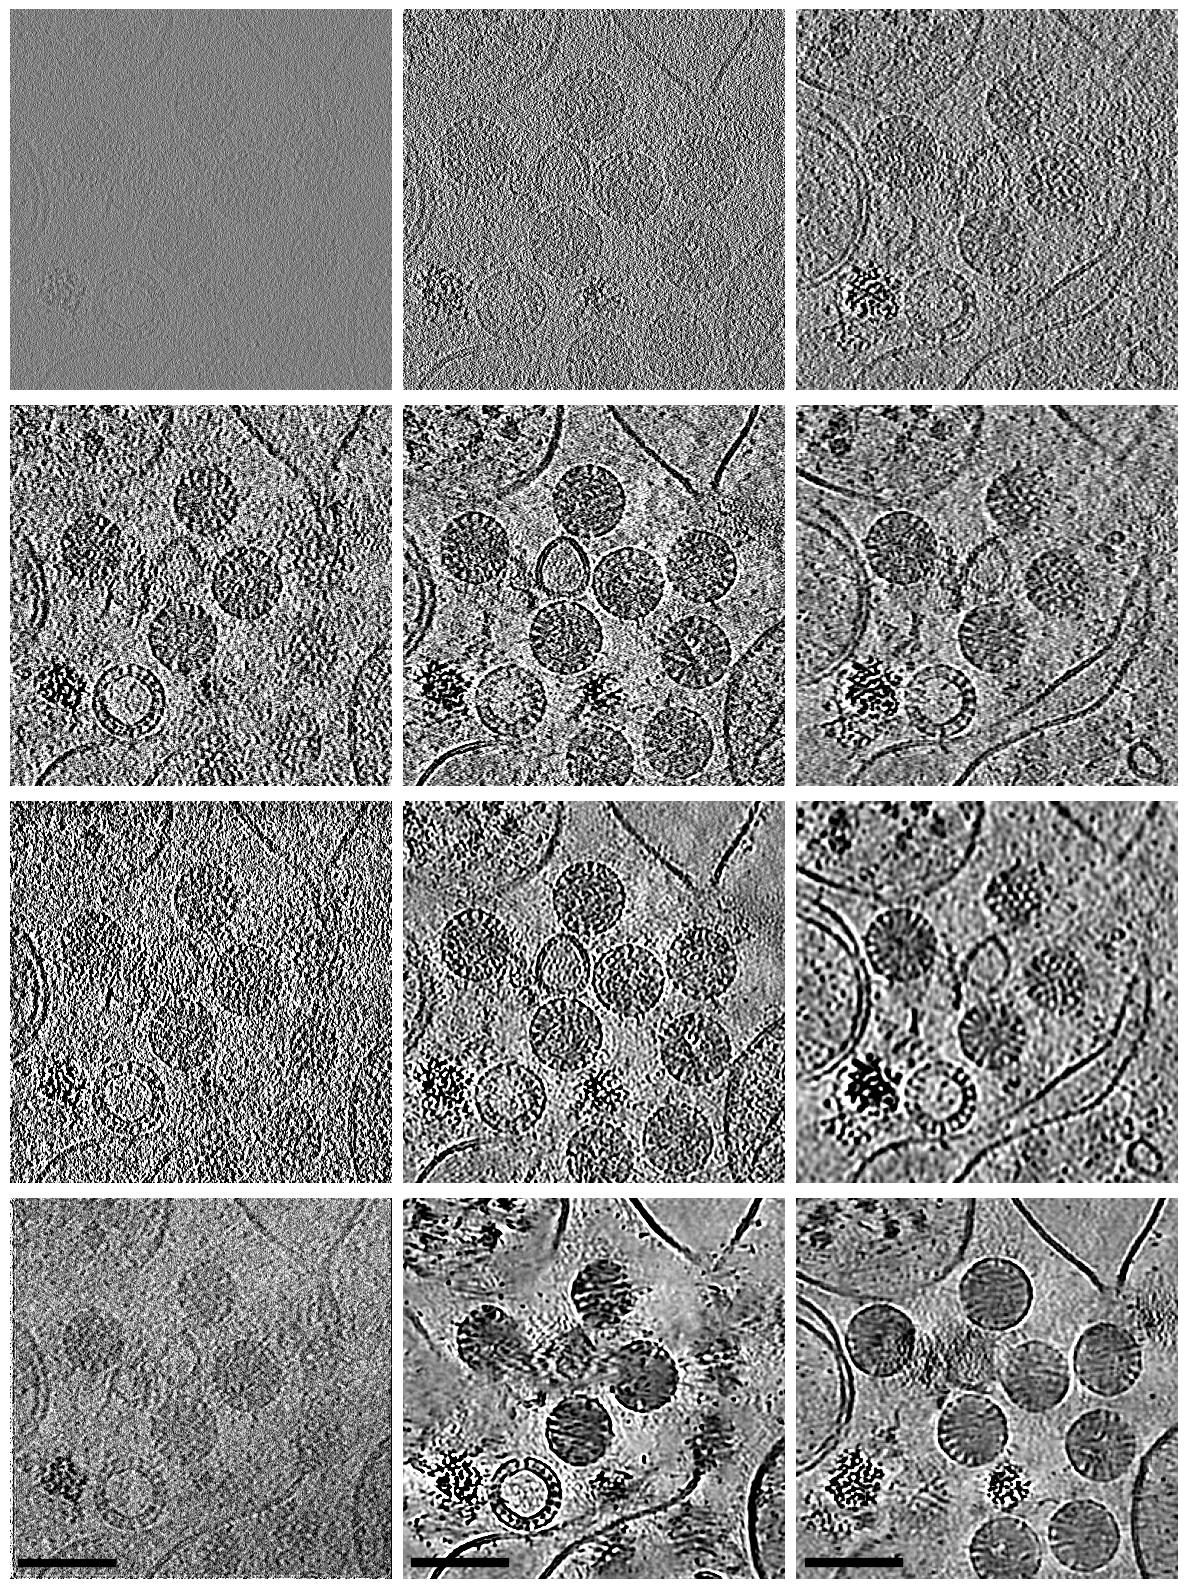

In [28]:
fig, axs = plt.subplots(4,3,figsize=(12, 16))

bins = np.asarray([6,3,1])
voxel_size = 2.62*bins
scale_length = [(1000/s) for s in voxel_size] 

for i in range(3):

    ax = axs[0][2-i]
    ax.imshow(equalized_raw[i], cmap='grey', vmin=bounds_raw[i][0], vmax=bounds_raw[i][1])
    ax.invert_yaxis()
    ax.set_axis_off()

    ax = axs[1][2-i]
    ax.imshow(equalized_cs[i], cmap='grey', vmin=bounds_cs[i][0], vmax=bounds_cs[i][1])
    ax.invert_yaxis()
    ax.set_axis_off()

    ax = axs[2][2-i]
    ax.imshow(equalized_tp[i], cmap='grey', vmin=bounds_tp[i][0], vmax=bounds_tp[i][1])
    ax.invert_yaxis()
    ax.set_axis_off()

    ax = axs[3][2-i]
    ax.imshow(equalized_cc[i], cmap='grey', vmin=bounds_cc[i][0], vmax=bounds_cc[i][1])
    ax.invert_yaxis()
    ax.set_axis_off()

    rect = patches.Rectangle((30/bins[i], 50/bins[i]), scale_length[i], 30/bins[i], linewidth=1, edgecolor='black', facecolor='black')
    ax.add_patch(rect)

plt.tight_layout()
# plt.savefig('fig3.svg', format='svg')
plt.show()